In [1]:
! pip install pandas

For an interview focused on geochemistry and anomaly detection, you might receive various types of datasets. 


Here are some examples of the data you could be sent and what each type can be used for:

### 1. **Geochemical Data**
   - **Description:** Contains measurements of different elements or compounds in rock or soil samples. Data might include concentrations of metals, minerals, or other geochemical markers.
   - **Example Data:**
     - Element concentrations (e.g., Cu, Au, Zn, Pb)
     - Sample locations (coordinates)
     - Depth of sample
     - Sample identifiers

   - **Use Cases:**
     - Identify patterns or trends in the concentration of elements.
     - Detect anomalies indicating potential ore deposits.

### 2. **Hyperspectral Data**
   - **Description:** Contains information from sensors that measure light across a range of wavelengths, providing detailed spectral information about the surface materials.
   - **Example Data:**
     - Spectral reflectance values at various wavelengths for each pixel
     - Images of the study area with spectral data

   - **Use Cases:**
     - Classify materials based on their spectral signature.
     - Detect and map mineralogical features.

### 3. **Drill Core Data**
   - **Description:** Includes data from drilling operations, such as core samples with measurements of different geological attributes.
   - **Example Data:**
     - Core sample depth intervals
     - Mineralogy and geochemistry of each interval
     - Structural data (e.g., fractures, veining)

   - **Use Cases:**
     - Analyze the distribution of minerals and their association with geological structures.
     - Model ore deposit distribution.

### 4. **Geophysical Data**
   - **Description:** Includes measurements from geophysical surveys, such as magnetic, gravity, or electromagnetic surveys.
   - **Example Data:**
     - Magnetic intensity measurements
     - Gravity anomalies
     - Electromagnetic conductivity values

   - **Use Cases:**
     - Interpret subsurface geological structures.
     - Integrate with geochemical data to identify target areas.

### 5. **Geological Mapping Data**
   - **Description:** Contains geological maps with different rock types, faults, and other geological features.
   - **Example Data:**
     - Rock types and their spatial distribution
     - Fault lines and structural features
     - Geological units

   - **Use Cases:**
     - Correlate geological features with geochemical anomalies.
     - Assess the geological context of the data.



   - **Use Cases:**
     - Analyze trends and temporal anomalies.
     - Study the effects of external factors (e.g., mining activities) on geochemical data.

### 7. **Annotated Data**
   - **Description:** Data with known labels or classifications, such as areas known to have high mineralization.
   - **Example Data:**
     - Labels indicating high-grade ore zones
     - Annotations of known anomalies or deposits

   - **Use Cases:**
     - Train and test machine learning models for classification or anomaly detection.
     - Validate predictions and findings with known data.

### What to Do with the Data
- **Exploration and Visualization:** Start by exploring the dataset to understand its structure. Use visualizations like histograms, scatter plots, or maps to get a sense of the data distribution and identify initial patterns or anomalies.
- **Preprocessing:** Clean the data by handling missing values, outliers, and normalizing or standardizing if needed.
- **Analysis:** Apply statistical methods or machine learning techniques to detect patterns, correlations, or anomalies. Techniques could include PCA, clustering, regression, or anomaly detection algorithms.
- **Validation:** Cross-check your findings with known geological information or use statistical validation methods.


### 1. **Geochemical Data**

Data:A sample (generated randomly), includes depth and many mineral concentration
Problem: find the depth of differet mineral deposits, and anomaly detection. Best depth for sulfide, LI, , and Ni.

Workflow:

1: cleaning


2:plot

3:statistical analysis

3:Anomaly detection

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
! pip install seaborn

In [331]:
path_data_Geochem=r"C:\Repos\Data\ML_repo_geo\geochemicaldata.csv"
data_Geochem=pd.read_csv(path_data_Geochem)

In [332]:
data_geom=pd.read_csv(path_data_Geochem)
data_geom.dropna()
data_Geochem.drop_duplicates(inplace=True)
data_geom=data_geom.iloc[0:1000, :]
data_geom['X']=np.random.uniform(low=0, high=500, size=1000)
data_geom['Y']=np.random.uniform(low=0, high=500, size=1000)
data_geom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   1000 non-null   float64
 1   CTNA    1000 non-null   float64
 2   CTMG    1000 non-null   float64
 3   CTAL    1000 non-null   float64
 4   CTSI    1000 non-null   float64
 5   CTP     1000 non-null   float64
 6   CTS     1000 non-null   float64
 7   CTCL    1000 non-null   float64
 8   CTAR    1000 non-null   float64
 9   CTK     1000 non-null   float64
 10  CTCA    1000 non-null   float64
 11  CTSC    1000 non-null   float64
 12  CTTI    1000 non-null   float64
 13  CTV     1000 non-null   float64
 14  CTCR    1000 non-null   float64
 15  CTMN    1000 non-null   float64
 16  CTFE    1000 non-null   float64
 17  CTCO    1000 non-null   float64
 18  CTNI    1000 non-null   float64
 19  CTCU    1000 non-null   float64
 20  CTZN    1000 non-null   float64
 21  CTGA    1000 non-null   float64
 22  C

####  1: what mineral are you looking for ?
#### 2: what type of data normally used for observation?
#### 3: specific ratio?
### 4: correlation with other types of mineral?
### 5: is there any specific location related feature that are representation of this mineral? any spatial pattern?
#### 6: correlation with drilling depth? 

In [333]:
mineral_data= data_geom[['CTS', 'CTCU', 'CTNA', 'CTZN']]
mineral_data.head()

CTS    CTCU    CTNA    CTZN
0  0.2587  1.9149  0.3306  3.9054
1  0.5857  0.9230  0.0901  1.3598
2  0.5614  1.7284  0.5727  2.4880
3  0.6006  1.8098  0.2351  2.2978
4  0.3762  2.2492  0.1401  1.4433

In [334]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_mineral=scaler.fit_transform(mineral_data)
mineral_scale_data=pd.DataFrame(scale_mineral, columns=['CTS', 'CTCU', 'CTNA', 'CTZN'])
more_column=data_geom[['X', 'Y', 'DEPTH']]

In [335]:
final_data=pd.concat([more_column, mineral_scale_data], axis=1)


In [337]:
print(final_data.head())

            X           Y   DEPTH       CTS      CTCU      CTNA      CTZN
0  156.646174    7.406067  0.0287 -0.853361 -0.469152 -0.184927  0.764213
1  232.603340   14.656729  0.0384 -0.647025 -0.670690 -1.117222 -1.045784
2  321.104158  109.679221  0.0466 -0.662358 -0.507046  0.753570 -0.243600
3    0.625064  186.993893  0.0565 -0.637623 -0.490506 -0.555132 -0.378838
4  355.531960  303.922902  0.0679 -0.779219 -0.401227 -0.923398 -0.986413


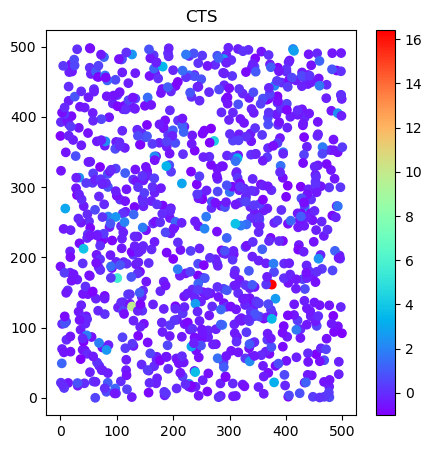

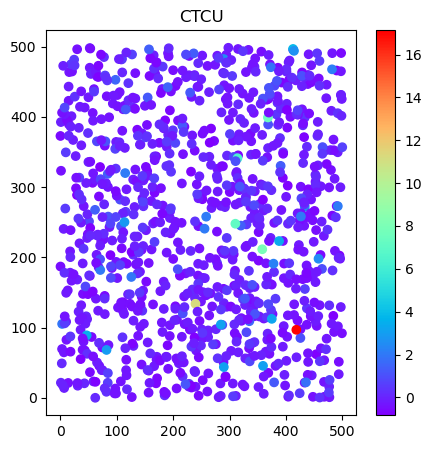

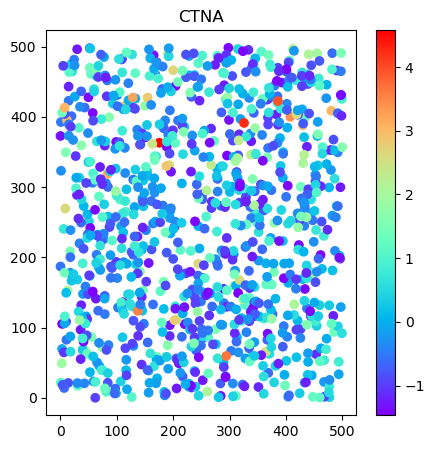

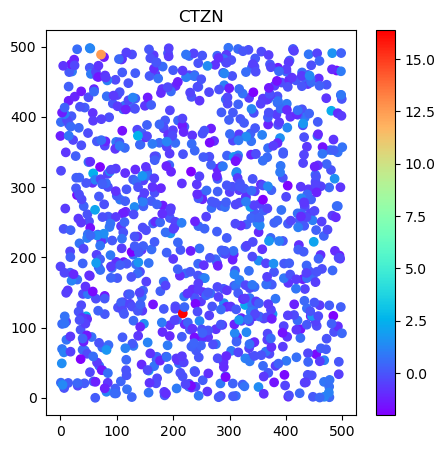

In [338]:
minerals=['CTS', 'CTCU', 'CTNA', 'CTZN']

for mineral in minerals:
    plt.figure(figsize=(5,5))
    plt.scatter(final_data['X'], final_data['Y'], c=final_data[mineral], cmap='rainbow')
    plt.title(f'{mineral}')
    plt.colorbar()

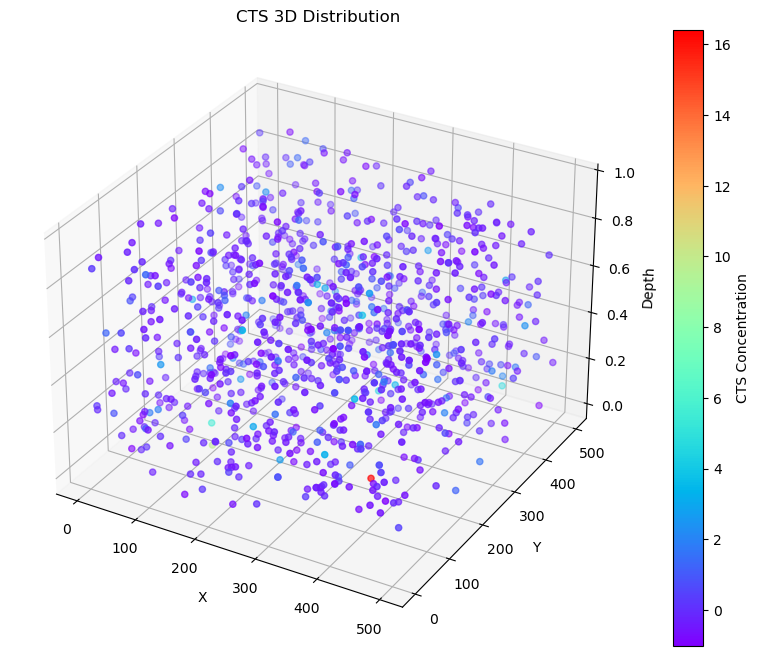

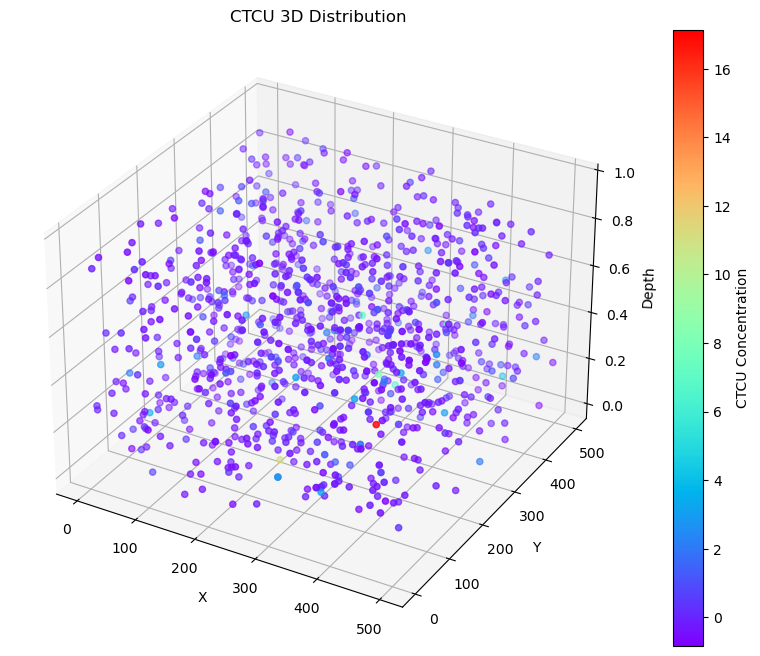

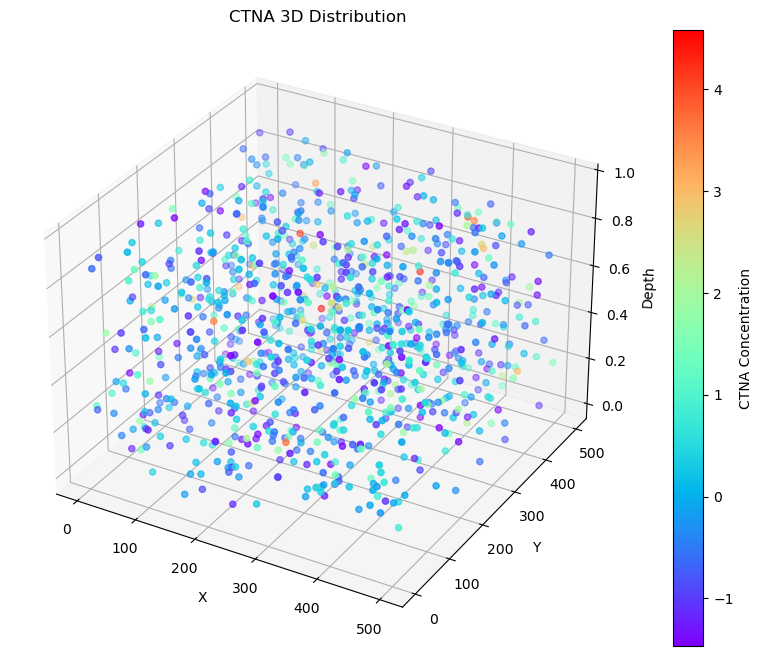

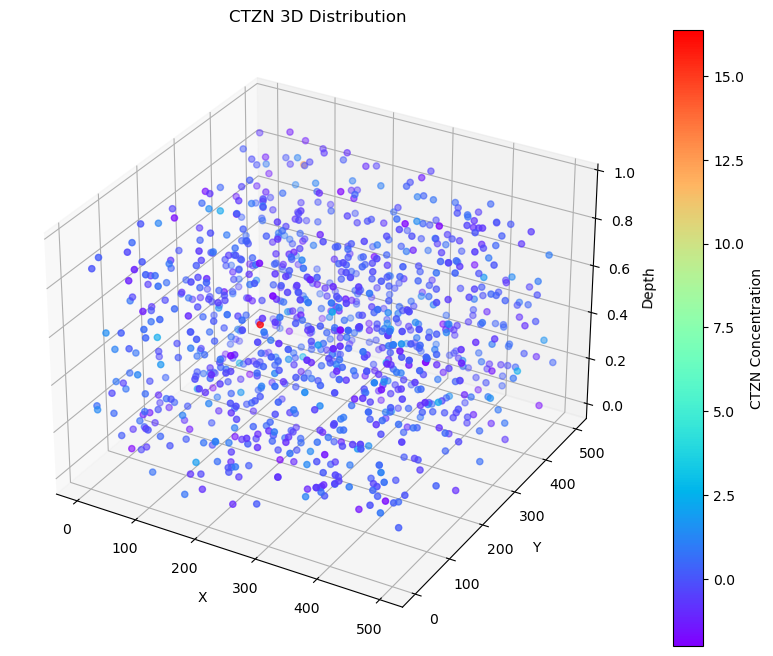

In [339]:
for mineral in minerals:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(final_data['X'], final_data['Y'], final_data['DEPTH'], c=final_data[mineral], cmap='rainbow', s=20)
    plt.colorbar(scatter, label=f'{mineral} Concentration')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth')
    ax.set_title(f'{mineral} 3D Distribution')
    plt.show()


           CTS      CTCU      CTNA      CTZN
CTS   1.000000  0.367541  0.068751 -0.006051
CTCU  0.367541  1.000000 -0.010437 -0.012399
CTNA  0.068751 -0.010437  1.000000  0.058602
CTZN -0.006051 -0.012399  0.058602  1.000000


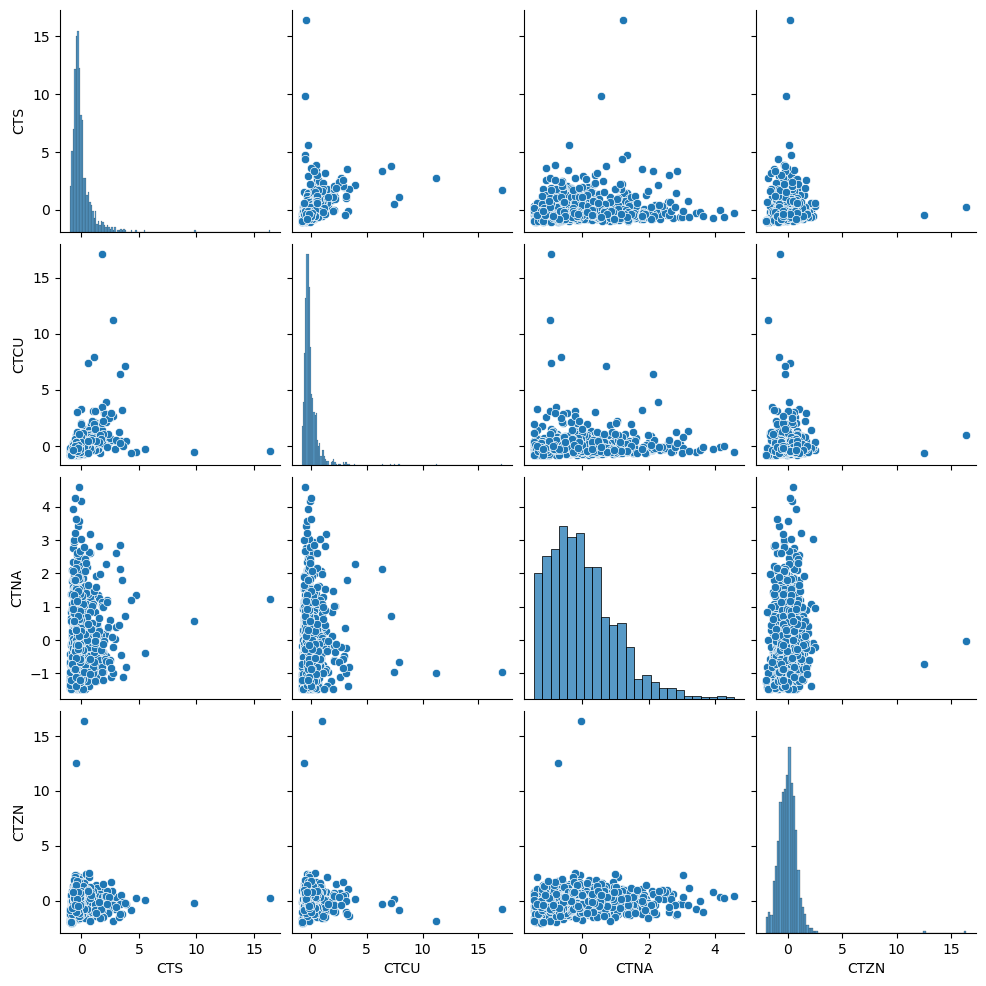

In [340]:
import seaborn as sns
# Compute correlation matrix
correlation_matrix = mineral_scale_data.corr()
print(correlation_matrix)
sns.pairplot(mineral_scale_data)
plt.show()

In [290]:
z_score_mineral=final_data[minerals].apply(zscore)
threshold = 3  # Common threshold is 3 standard deviations
anomalies=(z_score_mineral.abs()> threshold).any(axis=1)
final_data['Anomalyz']=anomalies
# Optionally, display only the anomalies
print(final_data[final_data['Anomalyz']])

              X           Y   DEPTH        CTS       CTCU      CTNA  \
79   188.932996  461.637043  0.8616  -0.279280  -0.496825  3.424470   
150  471.372627  427.919813  0.6733  -0.045622  -0.089950  4.156351   
197  111.576626  376.531523  0.2675  -0.486058  -0.154542  3.036046   
207  317.283400  442.082088  0.3718  -0.225898  -0.530960  4.577725   
529   73.542996  354.105419  0.0371   4.756387  -0.541404  1.343184   
530   50.148483    2.785003  0.0474   9.830481  -0.535390  0.569437   
531  148.970229  496.588109  0.0581  16.403192  -0.424634  1.238907   
532  399.007759  378.219685  0.0682   5.563116  -0.302033 -0.394257   
533  182.229924  341.224793  0.0797   4.352801  -0.593663  1.205569   
657  449.751380   54.187354  0.4325  -0.071304   3.324901 -1.364154   
660   46.739460  301.316200  0.4641   3.437857   0.471447 -0.445039   
668  151.182696   56.972807  0.5466   0.748739   1.373056  3.187229   
677  366.691980  224.720899  0.6405   0.259906   1.009458 -0.030255   
712  2

##### In anomaly detection, the Z-score (or standard score) is a statistical measure that describes a value's position relative to the mean of a group of values, measured in terms of standard deviations. It is often used to identify outliers or anomalies in a dataset.

In [320]:
final_data

X           Y   DEPTH       CTS      CTCU      CTNA      CTZN  \
0    113.622414  370.164242  0.0287 -0.853361 -0.469152 -0.184927  0.764213   
1    355.948625  230.861459  0.0384 -0.647025 -0.670690 -1.117222 -1.045784   
2    366.457150  492.177994  0.0466 -0.662358 -0.507046  0.753570 -0.243600   
3     10.489997  228.128051  0.0565 -0.637623 -0.490506 -0.555132 -0.378838   
4    197.878852   56.225337  0.0679 -0.779219 -0.401227 -0.923398 -0.986413   
..          ...         ...     ...       ...       ...       ...       ...   
995   35.943946  313.344951  0.3298 -0.362067 -0.444180  1.178821  0.165313   
996  346.793041  495.614223  0.3403 -0.804900 -0.229354 -0.719882 -0.639075   
997  247.036289  445.530419  0.3515 -0.559001  0.004206 -0.880756 -0.397538   
998  308.865608  296.553679  0.3616 -0.322693 -0.154522 -0.134533 -0.448092   
999  439.650523  269.268384  0.3721 -0.770637 -0.358031  0.941968  0.759947   

     Anomalyz  CTCU_normalized   z_score  anomaly_z  anomaly_iso  anomaly_lof  \
0       False        -0.468917 -0.469152      False        False        False   
1       False        -0.670354 -0.670690      False         True         True   
2       False        -0.506792 -0.507046      False         True        False   
3       False        -0.490261 -0.490506      False         True        False   
4       False        -0.401027 -0.401227      False        False         True   
..        ...              ...       ...        ...          ...          ...   
995     False        -0.443958 -0.444180      False        False         True   
996     False        -0.229239 -0.229354      False        False        False   
997     False         0.004204  0.004206      False         True        False   
998     False        -0.154444 -0.154522      False        False        False   
999     False        -0.357851 -0.358031      False        False        False   

     anomaly  KMeans Cluster  
0      False               2  
1       True               2  
2       True               0  
3       True               2  
4       True               2  
..       ...             ...  
995     True               0  
996    False               2  
997     True               2  
998    False               2  
999    False               0  

[1000 rows x 15 columns]

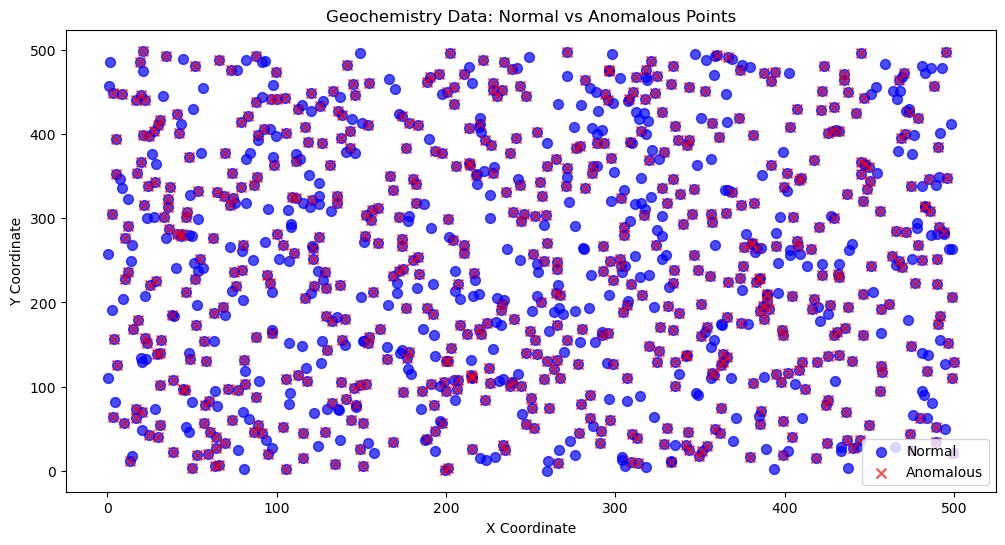

In [325]:
# Plot normal vs anomalous points
plt.figure(figsize=(12, 6))

# Plot normal data
plt.scatter(final_data['X'], final_data['Y'], c='blue', label='Normal', alpha=0.7, s=50)

# Plot anomalous data
anomalous_data = final_data[final_data['anomaly']]
plt.scatter(anomalous_data['X'], anomalous_data['Y'], c='red', label='Anomalous', alpha=0.7, s=50, marker='x')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Geochemistry Data: Normal vs Anomalous Points')
plt.legend()
plt.show()

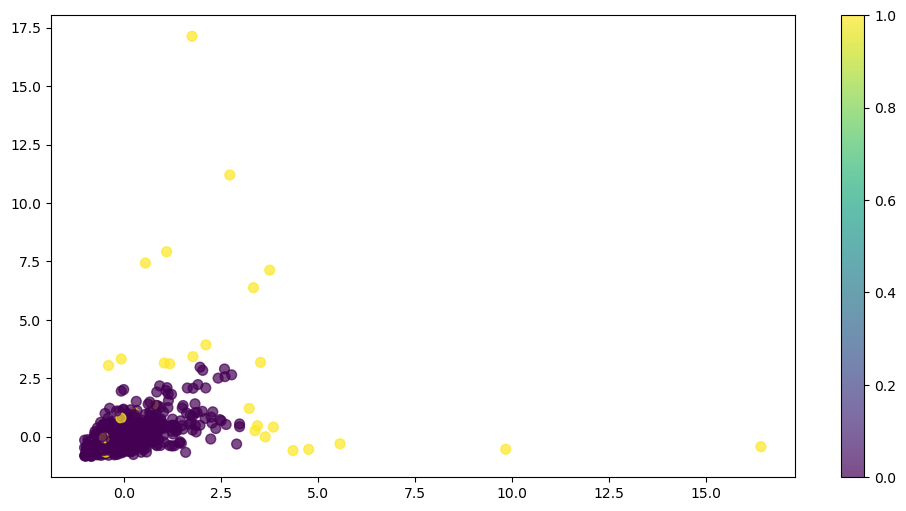

In [295]:
plt.figure(figsize=(12, 6))
plt.scatter(final_data['CTS'], final_data['CTCU'], c=final_data['Anomalyz'], s=50, alpha=0.7)
plt.colorbar()

#### Analysis:
Cluster Observation:

The majority of the data points are clustered in the bottom-left corner, indicating that most of the values for CTS and CTCU are relatively low.
A few points are scattered further out, indicating higher values for CTS and CTCU.
Anomaly Detection:

The color gradient represents the Anomalyz values, with darker colors indicating lower anomaly scores and brighter colors indicating higher anomaly scores.
Points with brighter colors (yellow) are potential anomalies. These points are more spread out and farther from the main cluster, which suggests they are outliers.
Relationship Between CTS and CTCU:

There is a concentration of points with low CTS and CTCU values, suggesting a possible correlation or interaction between these two variables.
Points with higher CTS values tend to have higher CTCU values, but this pattern is not strong due to the presence of outliers.

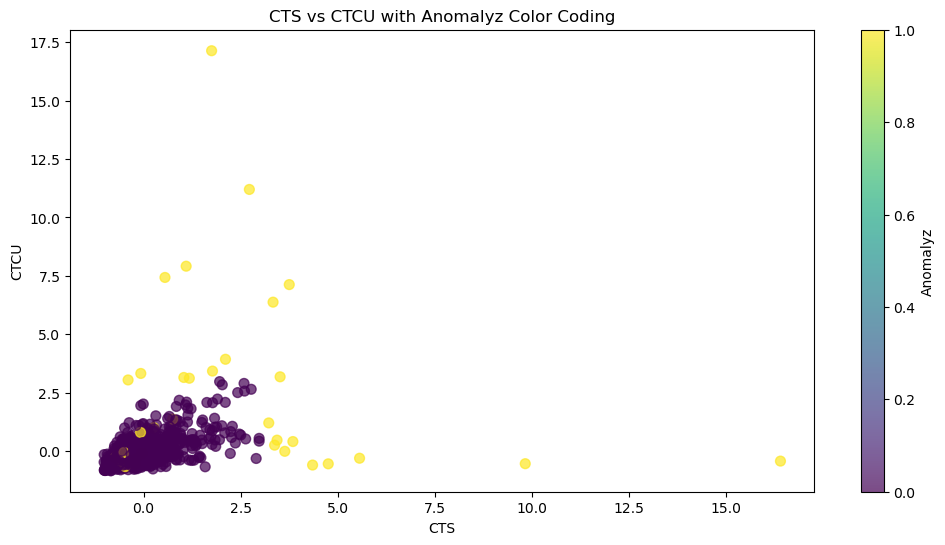

Descriptive Statistics:
                CTS          CTCU
count  1.000000e+03  1.000000e+03
mean  -2.842171e-17 -5.684342e-17
std    1.000500e+00  1.000500e+00
min   -1.016600e+00 -8.364067e-01
25%   -4.981414e-01 -4.089738e-01
50%   -2.417675e-01 -2.170514e-01
75%    1.518007e-01  1.159010e-01
max    1.640319e+01  1.713178e+01


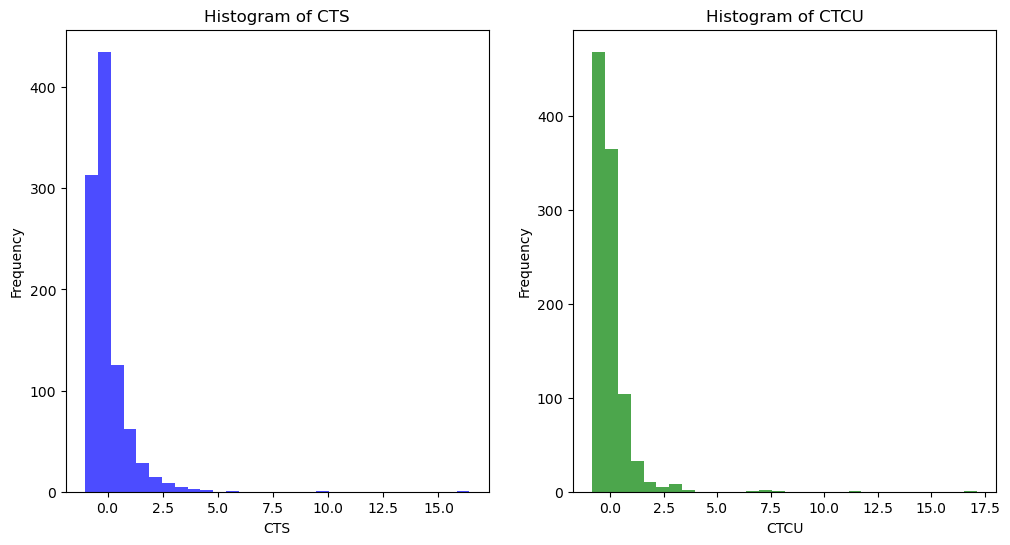

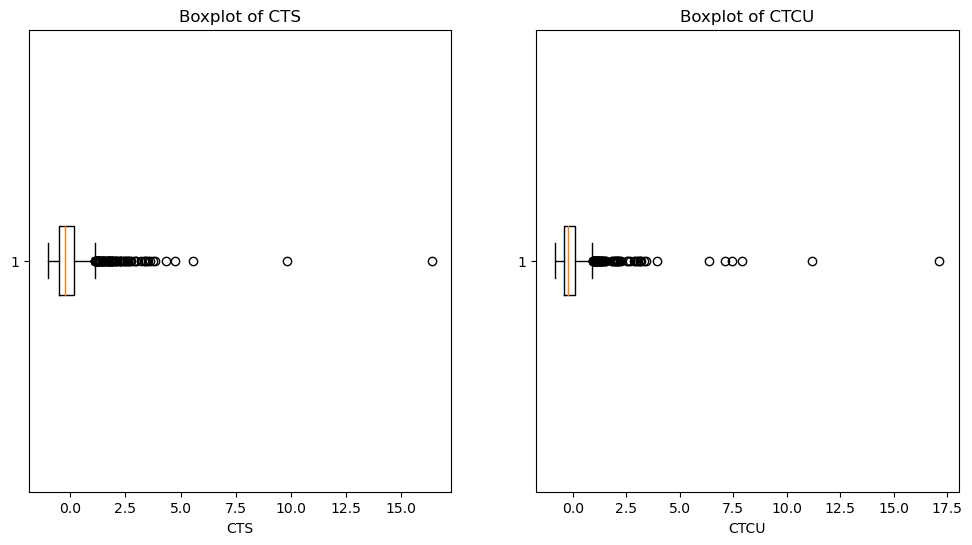

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample scatter plot with colorbar
plt.figure(figsize=(12, 6))
scatter = plt.scatter(final_data['CTS'], final_data['CTCU'], c=final_data['Anomalyz'], s=50, alpha=0.7)
plt.colorbar(scatter, label='Anomalyz')
plt.xlabel('CTS')
plt.ylabel('CTCU')
plt.title('CTS vs CTCU with Anomalyz Color Coding')
plt.show()

# Descriptive statistics
print("Descriptive Statistics:")
print(final_data[['CTS', 'CTCU', 'Anomalyz']].describe())

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(final_data['CTS'], bins=30, alpha=0.7, color='blue')
plt.xlabel('CTS')
plt.ylabel('Frequency')
plt.title('Histogram of CTS')

plt.subplot(1, 2, 2)
plt.hist(final_data['CTCU'], bins=30, alpha=0.7, color='green')
plt.xlabel('CTCU')
plt.ylabel('Frequency')
plt.title('Histogram of CTCU')
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(final_data['CTS'], vert=False)
plt.xlabel('CTS')
plt.title('Boxplot of CTS')

plt.subplot(1, 2, 2)
plt.boxplot(final_data['CTCU'], vert=False)
plt.xlabel('CTCU')
plt.title('Boxplot of CTCU')
plt.show()


The interquartile range (IQR) is relatively small compared to the range between the min and max values, indicating that most data points are clustered around the median, with a few extreme values (outliers).

In [302]:
pca.explained_variance_ratio_

array([0.34306868, 0.26539404, 0.23553313, 0.15600415])

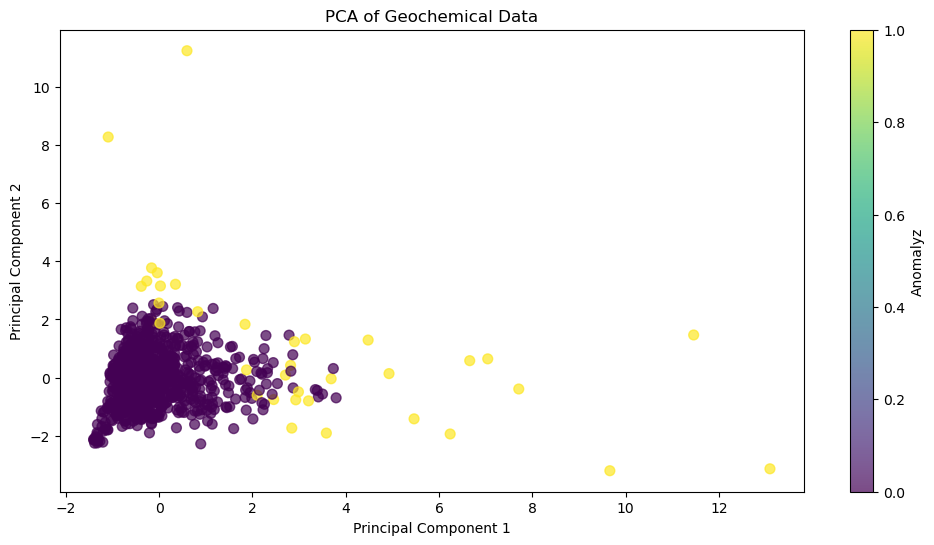

In [305]:
from sklearn.decomposition import PCA
pca=PCA()
pca_features=pca.fit_transform(mineral_scale_data)
principal_df = pd.DataFrame(data=pca_features, columns=['principal component 1', 'principal component 2','principal component 3','principal component 4'])

# Visualize the PCA results
plt.figure(figsize=(12, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=final_data['Anomalyz'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Anomalyz')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Geochemical Data')
plt.show()

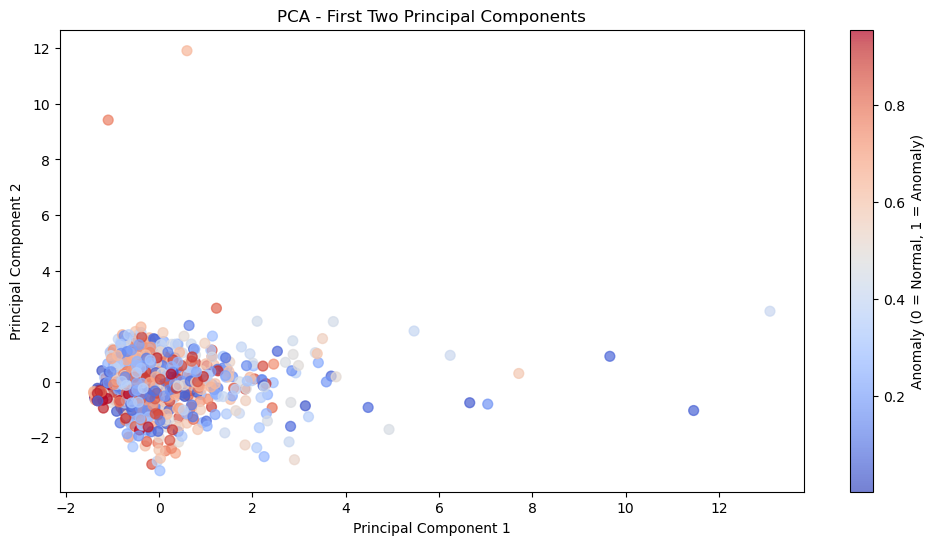

In [308]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(mineral_scale_data)

# Plot the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 2], c=final_data['DEPTH'], cmap='coolwarm', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Anomaly (0 = Normal, 1 = Anomaly)')
plt.show()


In [327]:
kmeans_clusters

array([2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 2,
       1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1,
       0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2,
       1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1,
       2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0,

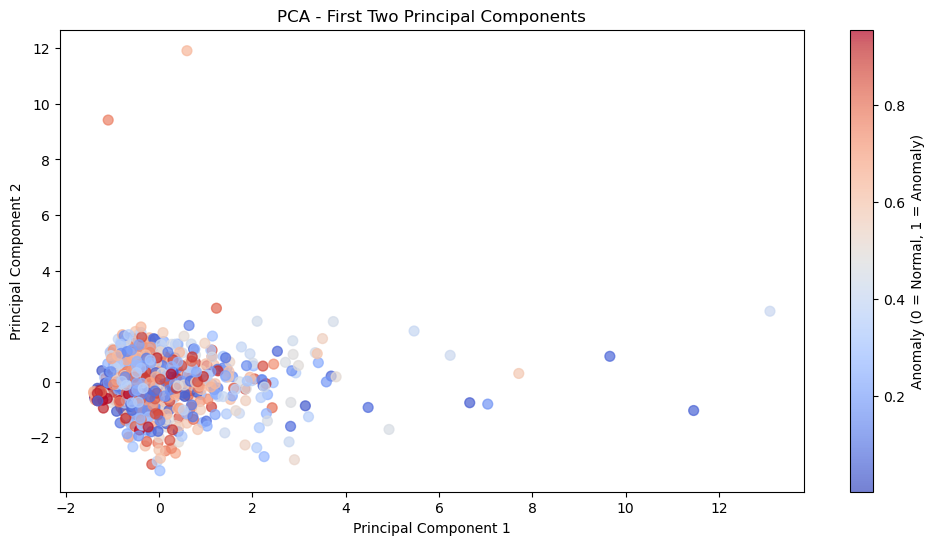

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(mineral_scale_data)

# Plot the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 2], c=final_data['DEPTH'], cmap='coolwarm', s=50, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Anomaly (0 = Normal, 1 = Anomaly)')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans_clusters = kmeans.fit_predict(final_data)

# Add cluster results to DataFrame
final_data['KMeans Cluster'] = kmeans_clusters

# Plot K-Means clusters (2D plot for visualization)
plt.figure(figsize=(12, 6))
plt.scatter(final_data[:, 0], final_data[:, 1], c=final_data[:,'KMeans Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


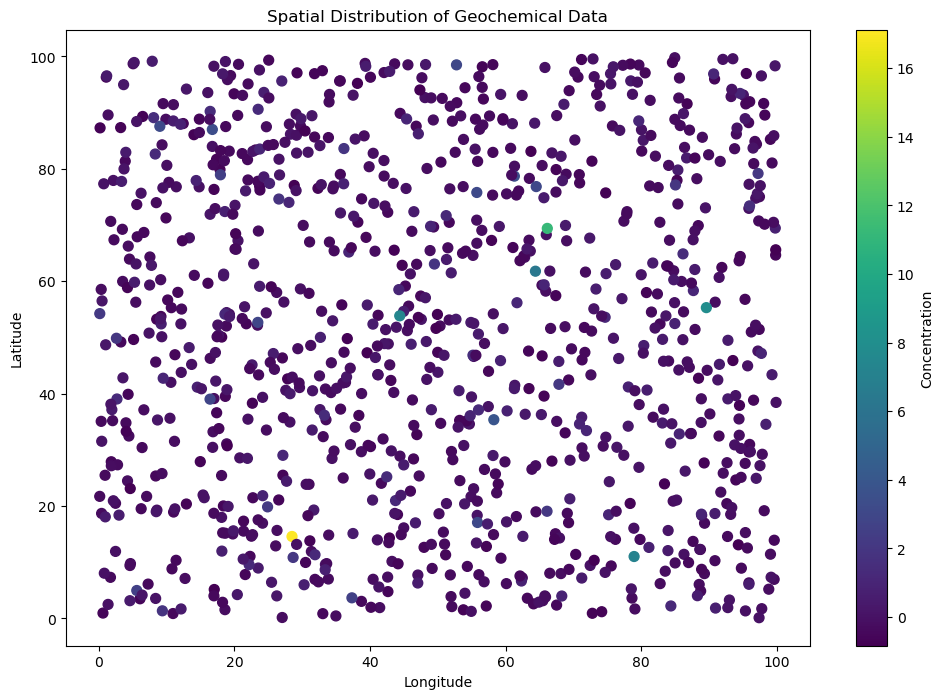

In [319]:
threshold = 0  # Define an interesting concentration threshold
interesting_signals = final_df[final_df['CTCU'] > threshold]
plt.figure(figsize=(12, 8))
plt.scatter(final_df['X'], final_df['Y'], c=final_df['CTCU'], cmap='viridis', s=50)
plt.colorbar(label='Concentration')
plt.title('Spatial Distribution of Geochemical Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


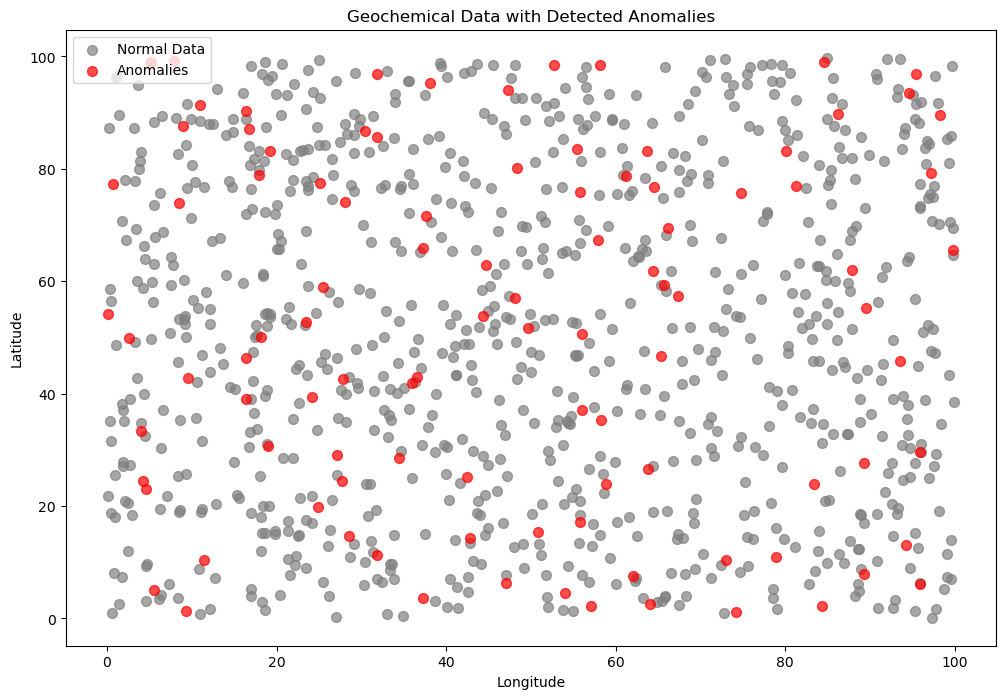

In [198]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd

# Assuming `data_Geochem` contains all your data including 'X' and 'Y'
# Ensure 'scaled_features' is the normalized/scaled feature data

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed

# Fit the model and predict anomalies
data_Geochem['anomaly'] = iso_forest.fit_predict(scaled_features)

# Separate normal and anomalous data
normal_data = data_Geochem[data_Geochem['anomaly'] == 1]
anomalies_iso = data_Geochem[data_Geochem['anomaly'] == -1]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(normal_data['X'], normal_data['Y'], c='gray', s=50, label='Normal Data', alpha=0.7)
plt.scatter(anomalies_iso['X'], anomalies_iso['Y'], c='red', s=50, label='Anomalies', alpha=0.7)

plt.title('Geochemical Data with Detected Anomalies')
plt.xlabel('Longitude')  # Replace with appropriate x-axis label if needed
plt.ylabel('Latitude')   # Replace with appropriate y-axis label if needed
plt.legend()
plt.show()


c:\Users\sakbarpour\AppData\Local\anaconda3\envs\ShaeTFPY\lib\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


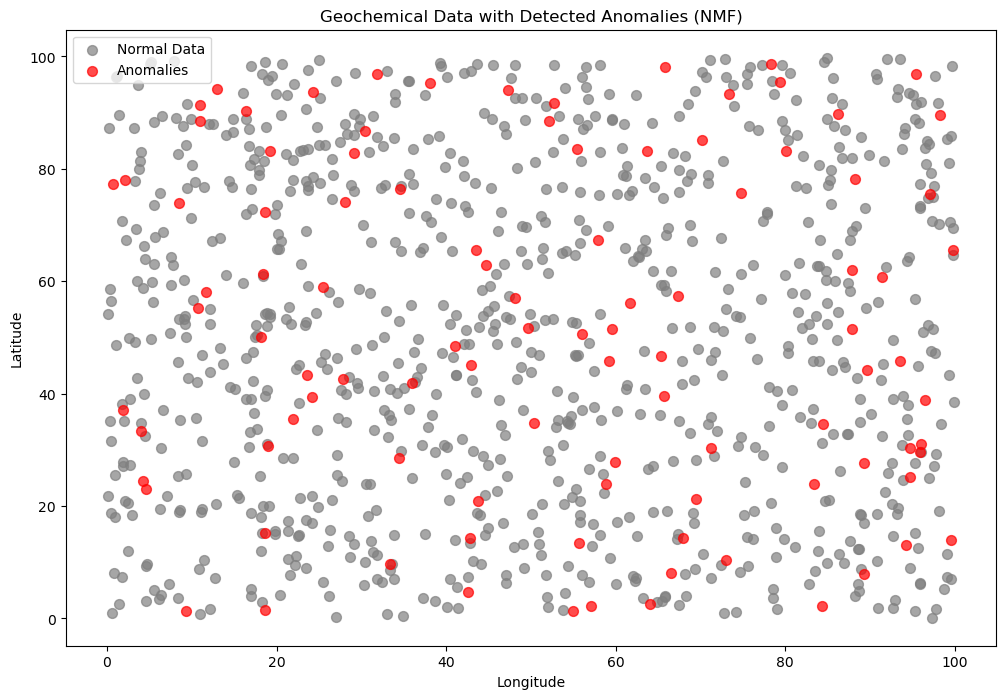

In [200]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data_Geochem[['CTS', 'CTNI', 'CTCU', 'CTNA', 'CTZN', 'CTK', 'CTMG']])

# Apply NMF
nmf = NMF(n_components=2, init='random', random_state=42)  # Adjust n_components as needed
nmf_features = nmf.fit_transform(scaled_features)

# Fit Isolation Forest on NMF components
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed
anomalies = iso_forest.fit_predict(nmf_features)

# Add anomaly results to the original DataFrame
data_Geochem['anomaly'] = anomalies

# Separate normal and anomalous data
normal_data = data_Geochem[data_Geochem['anomaly'] == 1]
anomalies_iso = data_Geochem[data_Geochem['anomaly'] == -1]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(normal_data['X'], normal_data['Y'], c='gray', s=50, label='Normal Data', alpha=0.7)
plt.scatter(anomalies_iso['X'], anomalies_iso['Y'], c='red', s=50, label='Anomalies', alpha=0.7)

plt.title('Geochemical Data with Detected Anomalies (NMF)')
plt.xlabel('Longitude')  # Adjust if needed
plt.ylabel('Latitude')   # Adjust if needed
plt.legend()
plt.show()

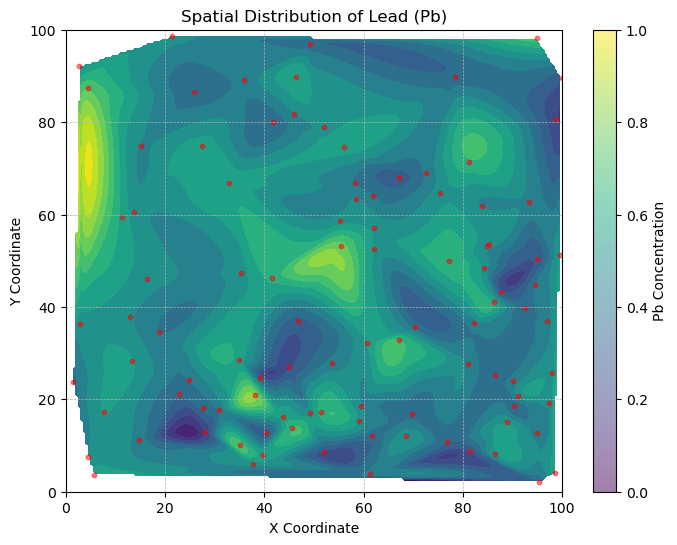

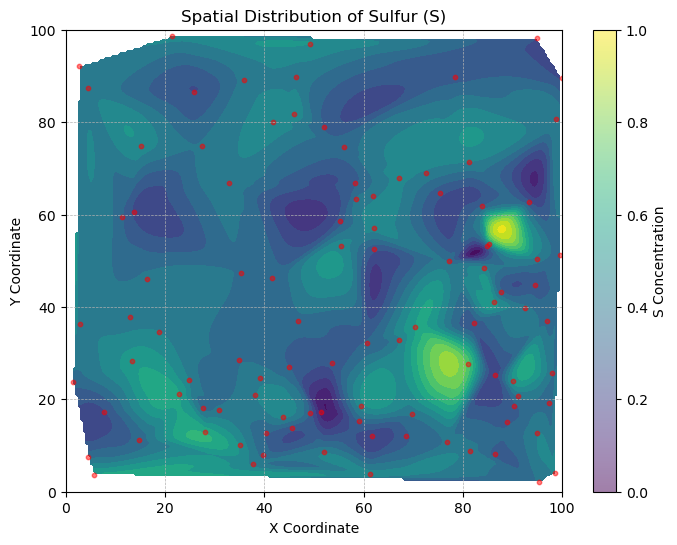

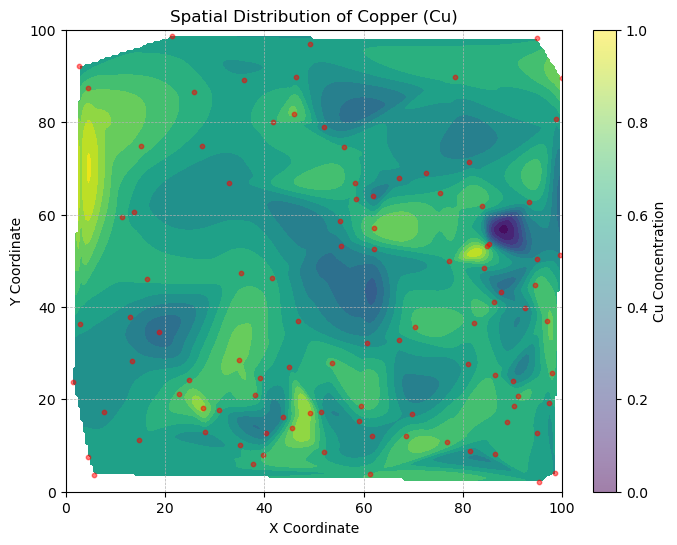

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.interpolate import griddata

# Generate random geochemical data including Pb, S, and Cu
np.random.seed(42)  # For reproducibility
data_Geochem = pd.DataFrame({
    'DEPTH': np.random.uniform(low=0, high=1000, size=100),
    'Pb': np.random.normal(loc=20, scale=5, size=100),
    'S': np.random.normal(loc=30, scale=7, size=100),
    'Cu': np.random.normal(loc=40, scale=10, size=100),
})

# Add random X and Y coordinates
data_Geochem['X'] = np.random.uniform(low=0, high=100, size=len(data_Geochem))
data_Geochem['Y'] = np.random.uniform(low=0, high=100, size=len(data_Geochem))

# Function to detect anomalies for a specific element
def detect_anomalies(data, element):
    # Scale the features
    scaler = StandardScaler()
    scaled_feature = scaler.fit_transform(data[[element]])
    
    # Initialize Isolation Forest
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    
    # Fit the model and predict anomalies
    data['anomaly'] = iso_forest.fit_predict(scaled_feature)
    
    return data

# Detect anomalies for Pb, S, and Cu
data_Geochem_Pb = detect_anomalies(data_Geochem.copy(), 'Pb')
data_Geochem_S = detect_anomalies(data_Geochem.copy(), 'S')
data_Geochem_Cu = detect_anomalies(data_Geochem.copy(), 'Cu')

# Function to plot spatial distribution as a heatmap
def plot_spatial_distribution(data, element, title):
    # Create grid data for contour plot
    grid_x, grid_y = np.mgrid[0:100:200j, 0:100:200j]
    points = data[['X', 'Y']].values
    values = data[element].values
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
    
    plt.figure(figsize=(8, 6))
    plt.contourf(grid_x, grid_y, grid_z, levels=15, cmap='viridis')
    plt.scatter(data['X'], data['Y'], c='red', s=10, alpha=0.5)
    plt.colorbar(label=f'{element} Concentration')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Plot spatial maps for Pb, S, and Cu anomalies
plot_spatial_distribution(data_Geochem_Pb, 'Pb', 'Spatial Distribution of Lead (Pb)')
plot_spatial_distribution(data_Geochem_S, 'S', 'Spatial Distribution of Sulfur (S)')
plot_spatial_distribution(data_Geochem_Cu, 'Cu', 'Spatial Distribution of Copper (Cu)')


# Workflow
1: Questions

Geological Context and Objectives
What is the geological context of the study area?

Are there known mineralization zones or geological structures in the area?
What is the geological history of the region?
What is the specific objective of this anomaly detection?

Are you looking for elevated concentrations of specific elements or patterns indicating mineralization?
Are there any specific geological features you expect to correlate with anomalies?
Data Collection and Quality
How were the samples collected and at what resolution?

Are the samples collected uniformly across the study area or are there regions with higher sampling density?
Are there any known biases or errors in the data collection process?
What preprocessing steps have been taken on this data?

Have the data been normalized or scaled?
Have missing values been handled, and if so, how?
Elemental Concentrations and Patterns
Which elements or compounds are of primary interest?

Are there specific threshold values for these elements that are considered anomalous?
Are there known element associations that indicate mineral deposits (e.g., Cu-Au, Pb-Zn)?
Are there any known background levels for these elements?

What are the typical concentration ranges for these elements in non-anomalous areas?
Spatial and Depth Considerations
How should spatial relationships be considered?

Should anomalies be detected based on spatial clustering of high concentrations?
Are there known trends in element concentrations with depth?
Is there any additional spatial or geological data that should be integrated?

Are there maps of geological features, fault lines, or other relevant spatial data?
Anomaly Detection and Interpretation
What methods or algorithms have been previously used for anomaly detection in this context?

Are there preferred statistical or machine learning methods for detecting anomalies in this type of data?
How should anomalies be interpreted?

What constitutes a significant anomaly in this context?
Are there specific follow-up actions or validations required for identified anomalies?
Expected Output
What is the expected format and visualization of the results?

Do you require spatial maps, 3D models, or statistical reports of the anomalies?
Are there specific visualization tools or formats preferred for presenting the results?
Are there any specific deliverables or timelines?

What is the deadline for the analysis?
Are there any interim reports or updates needed during the analysis process?
Example Application of Questions
Using these questions, here's how you might proceed with the analysis once you have the answers:

Load and Preprocess Data:

Handle missing values, scale features, and integrate any additional spatial data provided.
Exploratory Data Analysis (EDA):

Perform EDA to understand the data distribution and identify initial patterns.
Apply Anomaly Detection Algorithms:

Use appropriate anomaly detection methods (e.g., Isolation Forest, DBSCAN, etc.) based on the geologist's input.
Interpret and Visualize Results:

Create spatial maps and visualizations highlighting the detected anomalies.
Provide statistical summaries and potential interpretations based on the geological context.

In [204]:
import pandas as pd
import numpy as np

# Generate random geochemical data
np.random.seed(42)
data_Geochem = pd.DataFrame({
    'Sample_ID': range(1, 101),
    'X': np.random.uniform(low=0, high=100, size=100),
    'Y': np.random.uniform(low=0, high=100, size=100),
    'DEPTH': np.random.uniform(low=0, high=1000, size=100),
    'Cu': np.random.normal(loc=20, scale=5, size=100),
    'Au': np.random.normal(loc=0.5, scale=0.1, size=100),
    'Zn': np.random.normal(loc=50, scale=10, size=100),
    'Pb': np.random.normal(loc=10, scale=2, size=100),
})

# Save to CSV
data_Geochem.to_csv('geochemical_data.csv', index=False)
print("Random geochemical data saved to 'geochemical_data.csv'")


Random geochemical data saved to 'geochemical_data.csv'


Statistical Summary:
        Sample_ID           X           Y       DEPTH          Cu          Au  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000   47.018074   49.783172  517.601331   20.349139    0.504772   
std     29.011492   29.748941   29.311125  293.426247    4.906396    0.097731   
min      1.000000    0.552212    0.695213    5.061584    3.793663    0.287610   
25%     25.750000   19.320076   24.200453  276.879864   16.970812    0.431252   
50%     50.500000   46.414245   50.562486  562.554933   20.416995    0.503575   
75%     75.250000   73.020312   76.618360  752.366942   23.770644    0.568707   
max    100.000000   98.688694   98.565045  990.053850   30.719720    0.718980   

               Zn          Pb  
count  100.000000  100.000000  
mean    48.398121   10.140646  
std     10.053149    1.992594  
min     26.980788    5.056711  
25%     41.172072    8.979368  
50%     48.408719   10.195985  
75%     55.400226   11.46

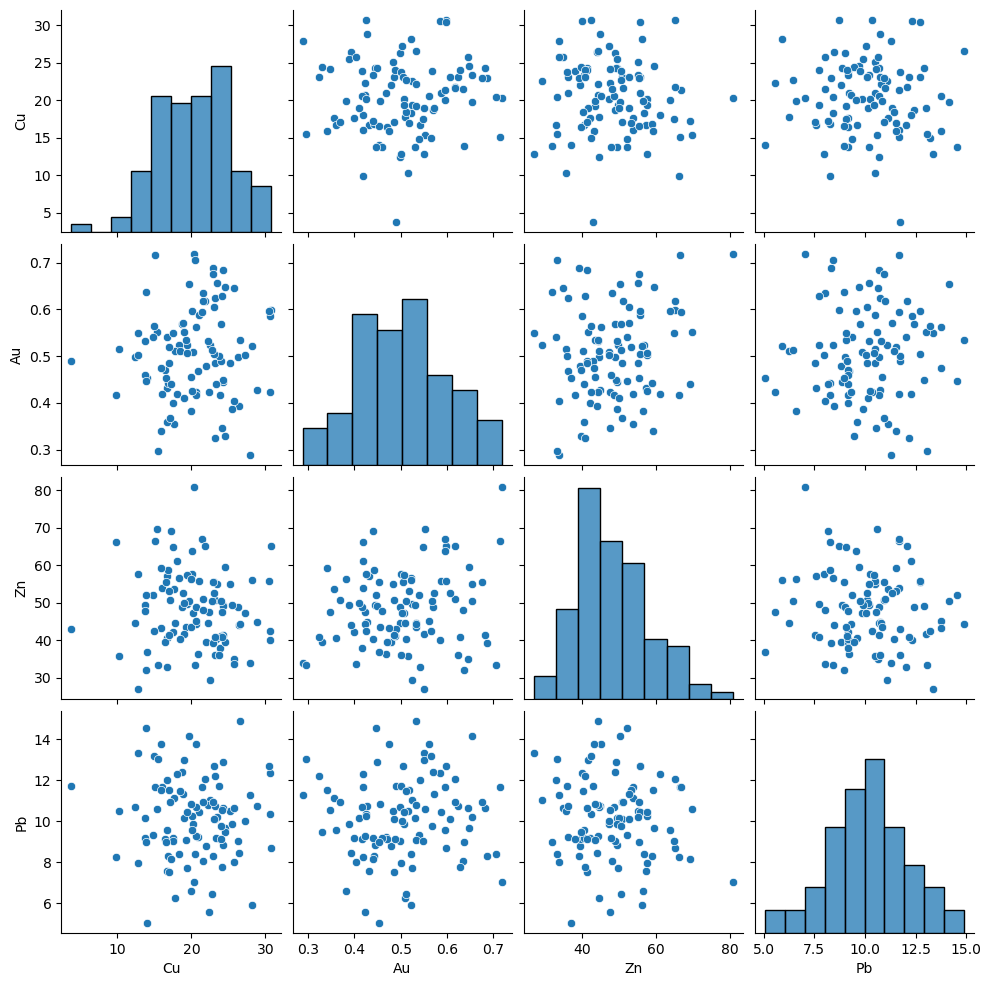

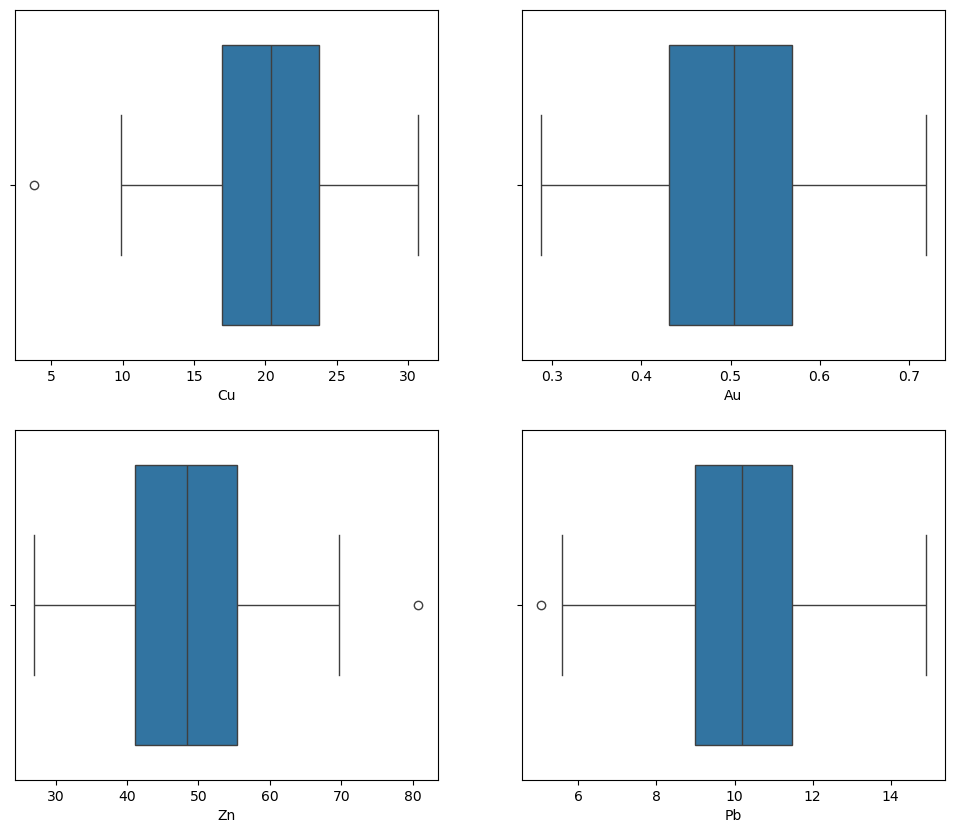

In [205]:
# Load the data
data = pd.read_csv('geochemical_data.csv')

# Data Preprocessing
# Handling missing values
data = data.dropna()

# Statistical Summary
summary = data.describe()
print("Statistical Summary:")
print(summary)

# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see the relationships
sns.pairplot(data[['Cu', 'Au', 'Zn', 'Pb']])
plt.show()

# Boxplots to see the distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(ax=axes[0, 0], x=data['Cu'])
sns.boxplot(ax=axes[0, 1], x=data['Au'])
sns.boxplot(ax=axes[1, 0], x=data['Zn'])
sns.boxplot(ax=axes[1, 1], x=data['Pb'])
plt.show()


Step 3: Formulate Questions for Geologist
Here are some questions that could be asked to a geologist for anomaly detection:

Geological Context:

What is the geological history of the area? Are there known mineralization zones?
Are there specific elements or element ratios that are known indicators of mineral deposits in this region?
Sampling Methods:

How were the samples collected? Are there any known issues with the sampling process that could introduce bias or errors?
Geochemical Anomalies:

What threshold values or patterns are considered anomalous for each element (Cu, Au, Zn, Pb)?
Are there known associations between different elements that can indicate certain types of mineralization?
Spatial Distribution:

Are there specific spatial patterns (e.g., clusters, trends) that you expect to see in the data?
How does the depth of the sample influence the concentrations of the elements?

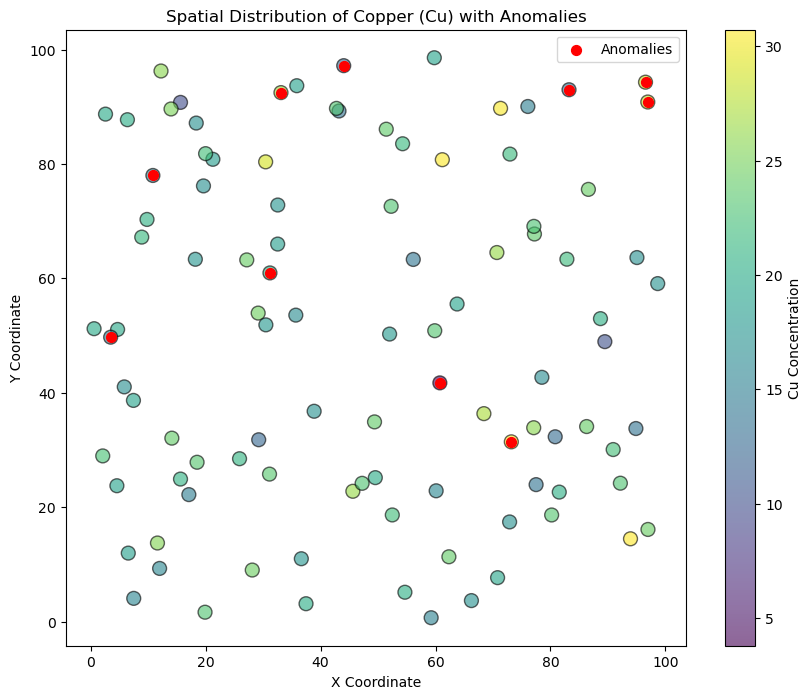

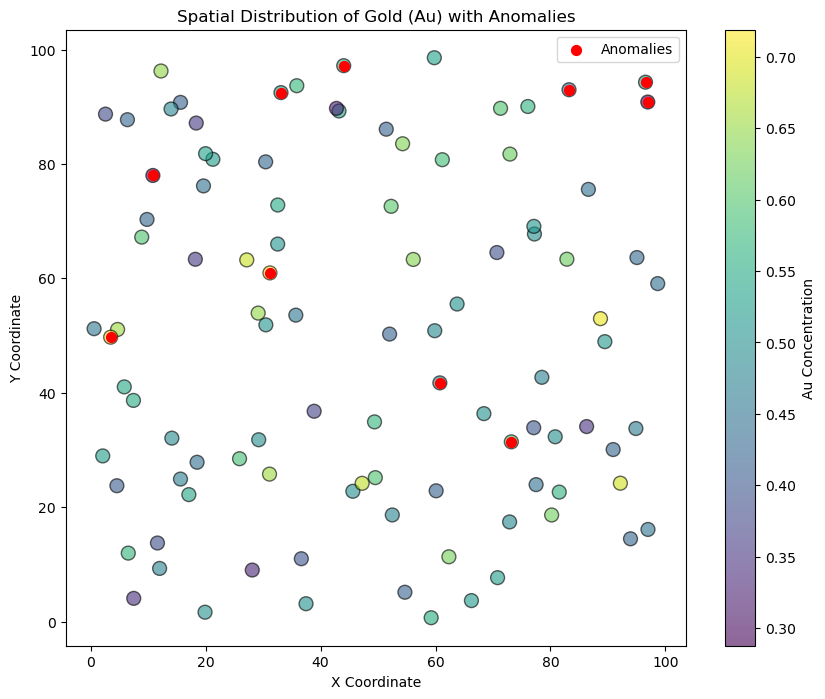

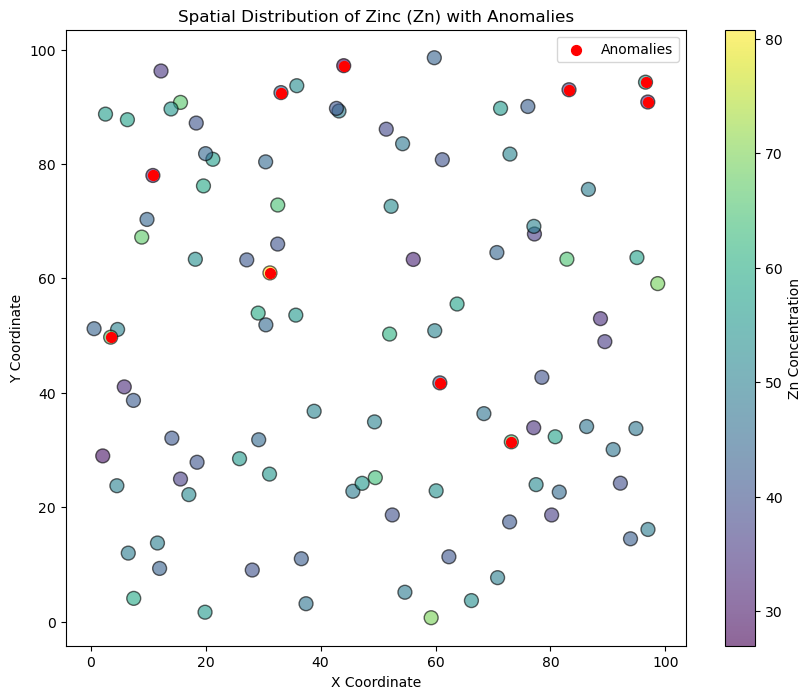

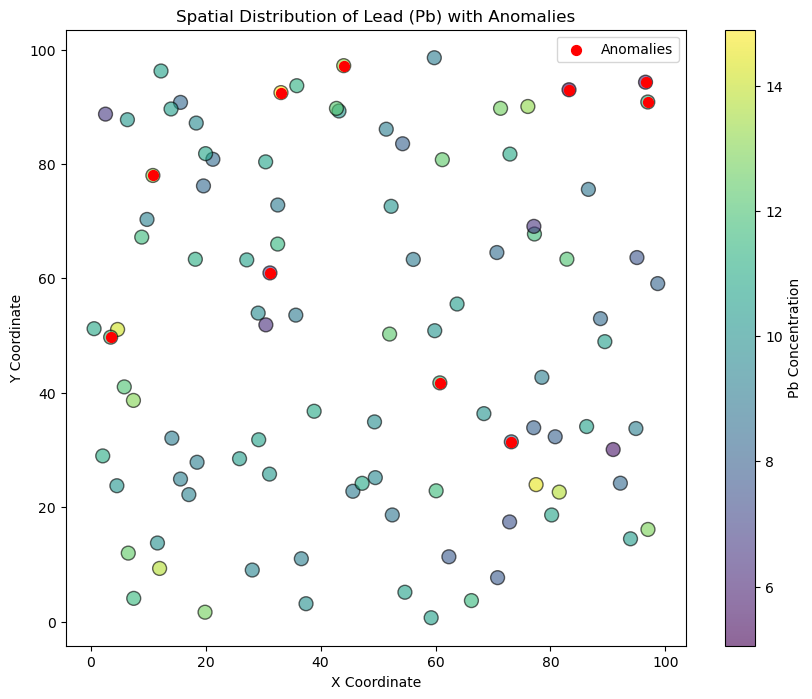

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Scaling the features
features = ['Cu', 'Au', 'Zn', 'Pb']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict anomalies
data['anomaly'] = iso_forest.fit_predict(scaled_features)

# Separate normal and anomalous data
normal_data = data[data['anomaly'] == 1]
anomalies_iso = data[data['anomaly'] == -1]

# Plot spatial distribution and highlight anomalies
def plot_spatial_distribution(data, element, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['X'], data['Y'], c=data[element], cmap='viridis', s=100, alpha=0.6, edgecolor='k')
    plt.colorbar(label=f'{element} Concentration')
    plt.scatter(anomalies_iso['X'], anomalies_iso['Y'], color='red', s=50, label='Anomalies')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

# Plot spatial maps for Cu, Au, Zn, and Pb anomalies
plot_spatial_distribution(data, 'Cu', 'Spatial Distribution of Copper (Cu) with Anomalies')
plot_spatial_distribution(data, 'Au', 'Spatial Distribution of Gold (Au) with Anomalies')
plot_spatial_distribution(data, 'Zn', 'Spatial Distribution of Zinc (Zn) with Anomalies')
plot_spatial_distribution(data, 'Pb', 'Spatial Distribution of Lead (Pb) with Anomalies')


In [356]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random geochemical data
np.random.seed(42)
data_Geochem = pd.DataFrame({
    'Sample_ID': range(1, 101),
    'X': np.random.uniform(low=0, high=100, size=100),
    'Y': np.random.uniform(low=0, high=100, size=100),
    'DEPTH': np.random.uniform(low=0, high=1000, size=100),
    'Cu': np.random.normal(loc=20, scale=5, size=100),
    'Au': np.random.normal(loc=0.5, scale=0.1, size=100),
    'Zn': np.random.normal(loc=50, scale=10, size=100),
    'Pb': np.random.normal(loc=10, scale=2, size=100),
    'CTCU': np.random.normal(loc=0.5, scale=0.2, size=100)  # Assuming CTCU is a column in your data
})

# Normalize the data for X and Y
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_Geochem[['X', 'Y']]), columns=['X', 'Y'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_Geochem['Cluster'] = kmeans.fit_predict(data_normalized)

# Display the first few rows
print(data_Geochem.head())

from scipy import stats

# Find anomalies in CTCU within each cluster
anomalies = []

for cluster in data_Geochem['Cluster'].unique():
    cluster_data = data_Geochem[data_Geochem['Cluster'] == cluster]
    z_scores = stats.zscore(cluster_data['CTCU'])
    cluster_data['Z-Score'] = z_scores
    # Anomaly if Z-score is above threshold (e.g., 3 or below -3)
    cluster_anomalies = cluster_data[np.abs(z_scores) > 3]
    anomalies.append(cluster_anomalies)

# Combine all anomalies into a single DataFrame
anomalies_df = pd.concat(anomalies)

# Display anomalies
print(anomalies_df)

from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Find anomalies in CTCU within each cluster
anomalies = []

for cluster in data_Geochem['Cluster'].unique():
    cluster_data = data_Geochem[data_Geochem['Cluster'] == cluster]
    cluster_data['Anomaly'] = iso_forest.fit_predict(cluster_data[['CTCU']])
    # Anomaly if the prediction is -1
    cluster_anomalies = cluster_data[cluster_data['Anomaly'] == -1]
    anomalies.append(cluster_anomalies)

# Combine all anomalies into a single DataFrame
anomalies_df = pd.concat(anomalies)

# Display anomalies
print(anomalies_df)


c:\Users\sakbarpour\AppData\Local\anaconda3\envs\ShaeTFPY\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sakbarpour\AppData\Local\Temp\ipykernel_18244\2791672764.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Z-Score'] = z_scores
C:\Users\sakbarpour\AppData\Local\Temp\ipykernel_18244\2791672764.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

   Sample_ID          X          Y       DEPTH         Cu        Au  \
0          1  37.454012   3.142919  642.031646  20.227859  0.507580   
1          2  95.071431  63.641041   84.139965  16.741998  0.432284   
2          3  73.199394  31.435598  161.628714  30.719720  0.597512   
3          4  59.865848  50.857069  898.554189  23.169595  0.485294   
4          5  15.601864  90.756647  606.429060   9.874287  0.417450   

          Zn         Pb      CTCU  Cluster  
0  47.305932   9.867840  0.468398        2  
1  57.175423   7.577968  0.414624        1  
2  65.023571   8.696328  0.297579        1  
3  50.740948  10.094797  0.169029        1  
4  66.286155   8.279173  0.664634        0  
Empty DataFrame
Columns: [Sample_ID, X, Y, DEPTH, Cu, Au, Zn, Pb, CTCU, Cluster, Z-Score]
Index: []
    Sample_ID          X          Y       DEPTH         Cu        Au  \
22         23  29.214465  31.800347   93.674768  12.403150  0.498098   
77         78   7.404465  38.673535  649.963931  18.989037 

C:\Users\sakbarpour\AppData\Local\Temp\ipykernel_18244\2791672764.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Anomaly'] = iso_forest.fit_predict(cluster_data[['CTCU']])
C:\Users\sakbarpour\AppData\Local\Temp\ipykernel_18244\2791672764.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Anomaly'] = iso_forest.fit_predict(cluster_data[['CTCU']])


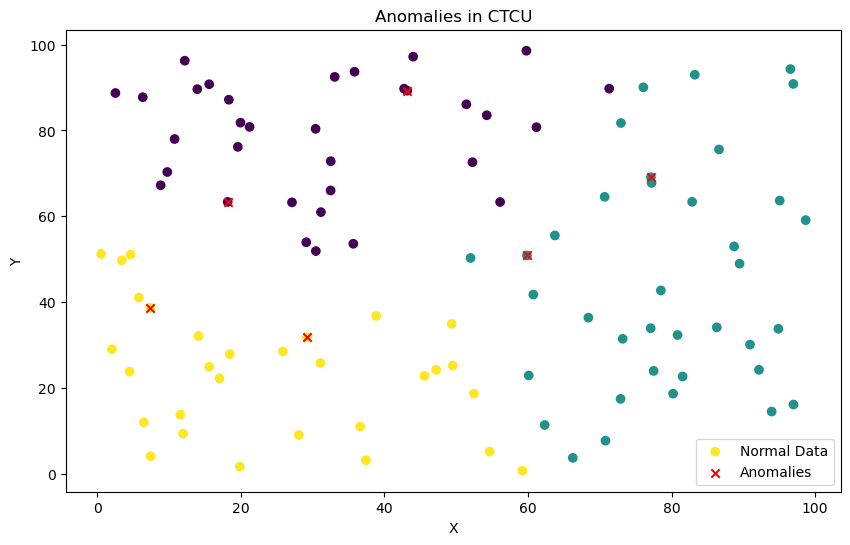

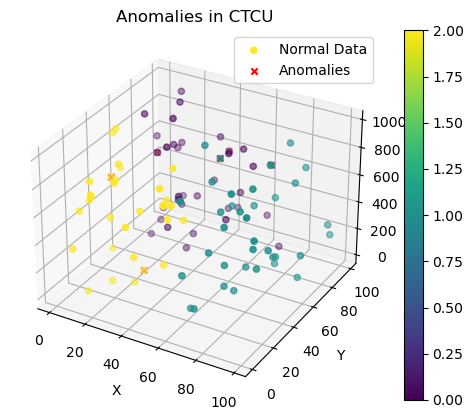

In [357]:
import matplotlib.pyplot as plt

# Plot anomalies in 2D (X vs Y)
plt.figure(figsize=(10, 6))
plt.scatter(data_Geochem['X'], data_Geochem['Y'], c=data_Geochem['Cluster'], cmap='viridis', label='Normal Data')
plt.scatter(anomalies_df['X'], anomalies_df['Y'], c='red', marker='x', label='Anomalies')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Anomalies in CTCU')
plt.legend()
plt.show()

# Optionally plot in 3D including DEPTH
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_Geochem['X'], data_Geochem['Y'], data_Geochem['DEPTH'], c=data_Geochem['Cluster'], cmap='viridis', label='Normal Data')
ax.scatter(anomalies_df['X'], anomalies_df['Y'], anomalies_df['DEPTH'], c='red', marker='x', label='Anomalies')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('DEPTH')
plt.colorbar(scatter)
plt.title('Anomalies in CTCU')
plt.legend()
plt.show()


   Sample_ID          X          Y       DEPTH         Cu        Au  \
0          1  37.454012   3.142919  642.031646  20.227859  0.507580   
1          2  95.071431  63.641041   84.139965  16.741998  0.432284   
2          3  73.199394  31.435598  161.628714  30.719720  0.597512   
3          4  59.865848  50.857069  898.554189  23.169595  0.485294   
4          5  15.601864  90.756647  606.429060   9.874287  0.417450   

          Zn         Pb      CTCU  Cluster      PCA1      PCA2  Z-Score-PCA1  \
0  47.305932   9.867840  0.468398        1 -0.627370 -0.362686     -0.540700   
1  57.175423   7.577968  0.414624        2  1.125835  2.150859      0.970303   
2  65.023571   8.696328  0.297579        2 -0.145766  1.311936     -0.125629   
3  50.740948  10.094797  0.169029        0  0.050481 -0.650039      0.043507   
4  66.286155   8.279173  0.664634        2 -0.996780  0.861623     -0.859076   

   Z-Score-PCA2  Anomaly  
0     -0.318478        1  
1      1.888685        1  
2      1.15

c:\Users\sakbarpour\AppData\Local\anaconda3\envs\ShaeTFPY\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


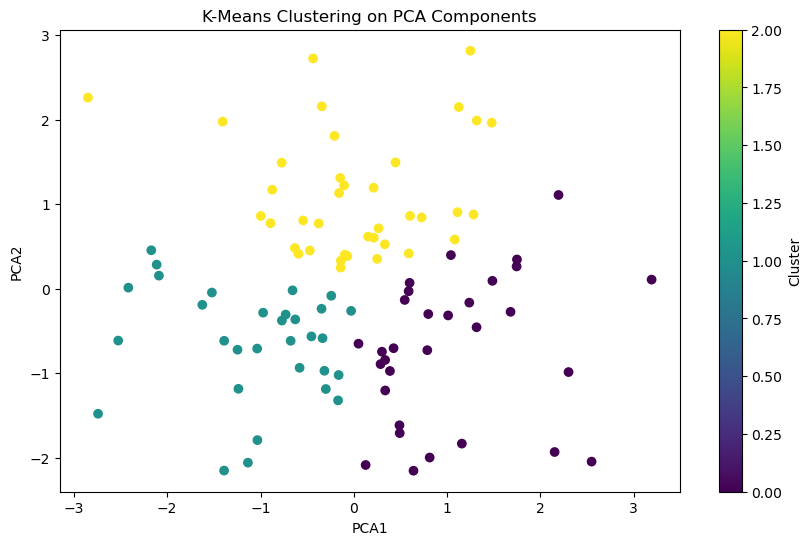

In [367]:
from sklearn.decomposition import PCA

# Select features for PCA
features = ['X', 'Y', 'DEPTH', 'Cu', 'Au', 'Zn', 'Pb', 'CTCU']

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_Geochem[features])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_components = pca.fit_transform(data_normalized)

# Add PCA components to the original DataFrame
data_Geochem['PCA1'] = pca_components[:, 0]
data_Geochem['PCA2'] = pca_components[:, 1]

print(data_Geochem.head())
# Apply K-Means clustering on PCA components
kmeans_pca = KMeans(n_clusters=3, random_state=42)
data_Geochem['Cluster'] = kmeans_pca.fit_predict(pca_components)

# Visualize PCA components with clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_Geochem['PCA1'], data_Geochem['PCA2'], c=data_Geochem['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering on PCA Components')
plt.colorbar(label='Cluster')
plt.show()


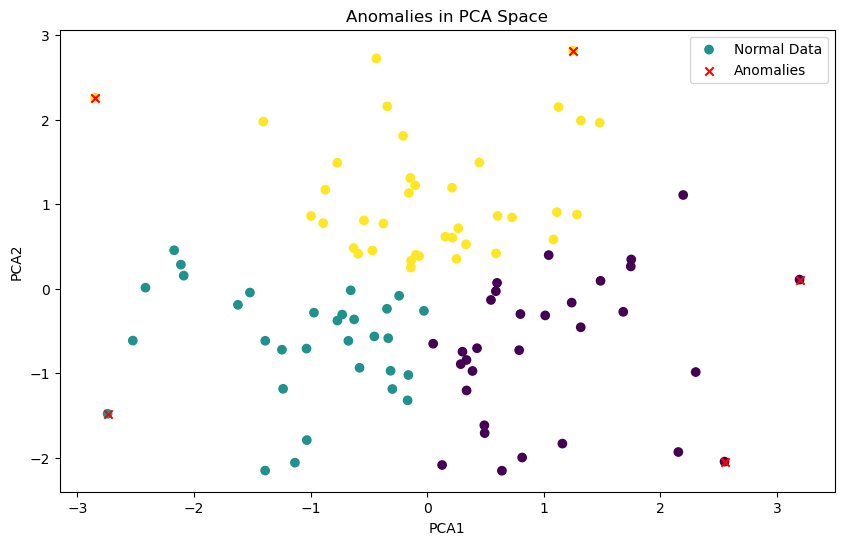

In [369]:

from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Find anomalies in PCA components
iso_forest.fit(pca_components)
data_Geochem['Anomaly'] = iso_forest.predict(pca_components)
anomalies_pca = data_Geochem[data_Geochem['Anomaly'] == -1]

# Plot PCA components with anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data_Geochem['PCA1'], data_Geochem['PCA2'], c=data_Geochem['Cluster'], cmap='viridis', label='Normal Data')
plt.scatter(anomalies_pca['PCA1'], anomalies_pca['PCA2'], c='red', marker='x', label='Anomalies')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Anomalies in PCA Space')
plt.legend()
plt.show()


### Possible Questions and Answers

1. **Can you describe your process for analyzing a new geochemistry dataset?**
   - **Answer:** My process starts with exploring the dataset to understand its structure and content. I perform data cleaning to handle missing values, outliers, and inconsistencies. Then, I use exploratory data analysis (EDA) to visualize the data and identify patterns or anomalies. I might use statistical methods or machine learning techniques to further analyze the data and derive insights. Finally, I validate my findings and prepare them for presentation or further analysis.

2. **How do you approach anomaly detection in geochemistry data?**
   - **Answer:** Anomaly detection can be approached using statistical methods or machine learning techniques. For statistical methods, I use techniques like Z-scores or IQR (Interquartile Range) to identify outliers. For machine learning, I might use algorithms such as Isolation Forest, One-Class SVM, or autoencoders. I also visualize anomalies to ensure they make sense in the geological context.

3. **What are some common statistical techniques you use for pattern recognition in geological data?**
   - **Answer:** Common techniques include correlation analysis, regression analysis, and principal component analysis (PCA). Correlation analysis helps identify relationships between variables, regression analysis can model these relationships, and PCA helps reduce dimensionality and identify key features.

4. **How would you handle missing values in a geochemistry dataset?**
   - **Answer:** Missing values can be handled through imputation methods, such as mean, median, or mode imputation. Alternatively, I might use more sophisticated techniques like K-nearest neighbors (KNN) imputation or model-based methods. If the missing values are extensive, I might analyze why the data is missing and consider whether to exclude those variables or observations.

5. **How do you validate your findings when analyzing geological data?**
   - **Answer:** Validation involves cross-referencing findings with known geological theories or results from other studies. I also use statistical validation techniques, such as cross-validation for predictive models, and ensure that results are reproducible and consistent.

6. **Can you give an example of a complex geological problem you’ve solved using data science?**
   - **Answer:** In a previous project, I used machine learning algorithms to predict ore deposits by analyzing hyperspectral data. I applied dimensionality reduction techniques like PCA, followed by clustering methods to group similar data points, and then used classification algorithms to predict the likelihood of ore deposits in various locations.


### Tips for the Interview

- **Understand the Problem:** Make sure you clearly understand the geological problem presented and the context. Ask clarifying questions if needed.
- **Data Preparation:** Be ready to clean and prepare the dataset quickly during the interview.
- **Communicate Your Approach:** Explain your thought process and rationale for choosing specific methods or techniques.
- **Visualizations:** Use visualizations to support your analysis and make your findings clearer.

Good luck with your interview! If you need more specific examples or details, just let me know.